In [3]:
!pip install selenium

# 웹페이지 크롤링

In [1]:
from bs4 import BeautifulSoup as bs
import time
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
def fb_crawling(url, page_down_num):
    # webdriver 로드
    driver = webdriver.Chrome('chromedriver')
    driver.get(url)

    # page_down 키 입력
    for c in range(0, page_down_num):
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        time.sleep(1)

    # 페이지 크롤링
    soup = bs(driver.page_source, 'lxml')
    # 글 내용 크롤링
    content_pages = soup.find_all('div', class_='kvgmc6g5 cxmmr5t8 oygrvhab hcukyx3x c1et5uql ii04i59q')
    # 글 좋아요 수 크롤링
    info_pages = soup.find_all('span', class_='pcp91wgn')
    # 글 내용, 좋아요 수 리스트화
    like_num_list = []
    contents_list = []
    for i in range(len(content_pages[:3])):
        like_num_list.append(int(info_pages[i].text))
        contents_list.append(content_pages[i].text)

    # 좋아요 수 막대 그래프 시각화
    plt.figure(figsize=(12,8))
    plt.xticks(range(len(like_num_list[:3])))
    plt.bar(range(len(like_num_list[:3])), height=like_num_list)
    
    for i in range(len(content_pages[:3])):
        plt.text(i, like_num_list[i], like_num_list[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                fontsize = 9, 
                color='blue',
                horizontalalignment='center',  # horizontalalignment (left, center, right)
                verticalalignment='bottom')    # verticalalignment (top, center, bottom)


    df = {'좋아요_수':like_num_list, '글_내용':contents_list}
    data = pd.DataFrame(df)
    file_name = str(datetime.today().strftime("%Y%m%d-%H%M%S"))
    file_name = 'facebook_' + file_name + '.csv'
    path = './crawling_data/'
    data.to_csv(path+file_name, index=False, encoding='utf-8')

    return data

# 페이지 크롤링, 크롤링한 자료 파일로 생성하기

In [7]:
# 크롤링할 웹사이트 주소
url = 'https://www.facebook.com/GyeonggiKorea.en'

<ipython-input-6-a4f08edc450f>:8: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead
  driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)


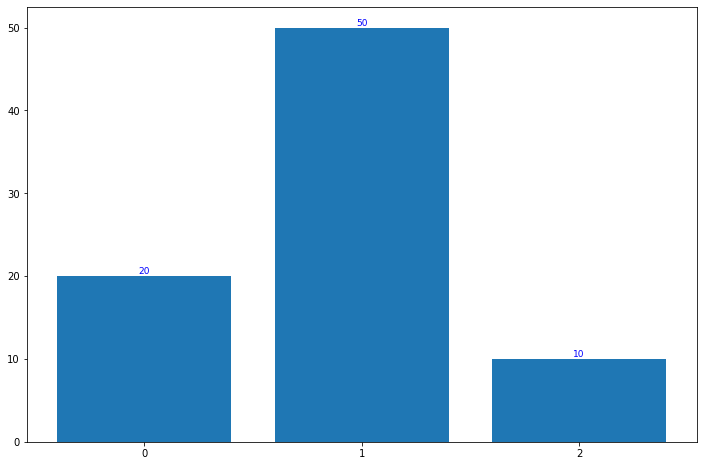

In [8]:
# fb_crawling(url, page_down 누르는 횟수)
page_down = 3
data = fb_crawling(url, page_down)

In [24]:
data

,좋아요_수,글_내용
0,18,Gyeonggi Province promotes local tourism with ...
1,44,Gyeonggi Province is taking the initiative in ...
2,9,Catch this week's #GTV English #News for the l...
3,47,Hwaseong Fortress of Suwon City
4,14,"Gwacheon City of Gyeonggi Province, known as t..."
5,18,Catch this week's #GTV English #News for the l...
6,27,Gyeonggi Province unveils Korea’s first virtua...
7,39,Famous for family trips: Yangtte Farm in Gyeon...
8,14,Catch this week's #GTV English #News for the l...
9,38,A healing travel course in Pocheon City of Gye...


# 코드 마지막